In [1]:

%run ../load_magic/dataframes

In [2]:

tables_url = 'http://www.demoscope.ru/weekly/app/app40e0e.php'
page_tables_list = get_page_tables(tables_url)

[(5, (84, 15)), (2, (1, 13)), (0, (3, 2)), (6, (2, 2)), (7, (1, 3)), (4, (2, 1)), (1, (1, 1)), (3, (1, 1))]


In [3]:

expectency_df = page_tables_list[5]
expectency_df.columns = expectency_df.iloc[1]
expectency_df = expectency_df.set_index(['Country', 'Sex']).iloc[2:].applymap(lambda x: int(x)/100)
expectency_df

1                       1960   1970   1980   1990   2000   2009   2010   2011  \
Country        Sex                                                              
Australia      male    67.95  67.44  71.09  73.97  76.95  79.50  79.86  79.98   
               female  74.05  74.19  78.23  80.14  82.28  84.05  84.25  84.31   
Austria        male    65.39  66.51  68.97  72.23  75.10  77.40  77.67  78.07   
               female  71.90  73.43  76.05  78.87  81.10  82.86  83.13  83.43   
Belarus        male    67.92  67.86  65.95  66.24  63.31  64.67  64.61  64.71   
...                      ...    ...    ...    ...    ...    ...    ...    ...   
Ukraine        female  73.80  74.43  74.06  74.90  73.52  74.84  75.19  75.85   
United Kingdom male    68.05  68.71  70.51  72.84  75.38  78.03  78.36  78.78   
               female  73.89  75.00  76.57  78.50  80.20  82.20  82.34  82.72   
United States  male    66.63  67.02  69.99  71.85  74.14  76.12  76.36  76.45   
               female  73.31  74.65  77.48  78.85  79.45  81.03  81.21  81.23   

1                       2012   2013   2014   2015  2016  
Country        Sex                                       
Australia      male    80.34  80.56  80.64  80.40  80.4  
               female  84.38  84.71  84.59  84.60  84.6  
Austria        male    78.27  78.46  78.91  78.80  79.0  
               female  83.29  83.56  83.72  83.70  84.0  
Belarus        male    66.60  67.23  67.81  68.60  68.0  
...                      ...    ...    ...    ...   ...  
Ukraine        female  75.99  76.21  76.70  77.30  76.0  
United Kingdom male    78.96  79.00  79.23  79.20  79.0  
               female  82.67  82.77  82.98  82.80  83.0  
United States  male    76.59  76.60  76.67  76.50  76.0  
               female  81.36  81.38  81.47  81.35  81.0  

[82 rows x 13 columns]

In [4]:

[f'expectency_df.{fn}' for fn in dir(expectency_df) if 'dif' in fn.lower()]

['expectency_df.diff']

In [5]:

expectency_df.diff(periods=1, axis='columns')

1                      1960  1970  1980  1990  2000  2009  2010  2011  2012  \
Country        Sex                                                            
Australia      male     NaN -0.51  3.65  2.88  2.98  2.55  0.36  0.12  0.36   
               female   NaN  0.14  4.04  1.91  2.14  1.77  0.20  0.06  0.07   
Austria        male     NaN  1.12  2.46  3.26  2.87  2.30  0.27  0.40  0.20   
               female   NaN  1.53  2.62  2.82  2.23  1.76  0.27  0.30 -0.14   
Belarus        male     NaN -0.06 -1.91  0.29 -2.93  1.36 -0.06  0.10  1.89   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
Ukraine        female   NaN  0.63 -0.37  0.84 -1.38  1.32  0.35  0.66  0.14   
United Kingdom male     NaN  0.66  1.80  2.33  2.54  2.65  0.33  0.42  0.18   
               female   NaN  1.11  1.57  1.93  1.70  2.00  0.14  0.38 -0.05   
United States  male     NaN  0.39  2.97  1.86  2.29  1.98  0.24  0.09  0.14   
               female   NaN  1.34  2.83  1.37  0.60  1.58  0.18  0.02  0.13   

1                      2013  2014  2015  2016  
Country        Sex                             
Australia      male    0.22  0.08 -0.24  0.00  
               female  0.33 -0.12  0.01  0.00  
Austria        male    0.19  0.45 -0.11  0.20  
               female  0.27  0.16 -0.02  0.30  
Belarus        male    0.63  0.58  0.79 -0.60  
...                     ...   ...   ...   ...  
Ukraine        female  0.22  0.49  0.60 -1.30  
United Kingdom male    0.04  0.23 -0.03 -0.20  
               female  0.10  0.21 -0.18  0.20  
United States  male    0.01  0.07 -0.17 -0.50  
               female  0.02  0.09 -0.12 -0.35  

[82 rows x 13 columns]

In [6]:

tables_url = 'http://www.gks.ru/free_doc/2008/demo/osn/05-08.htm'
page_tables_list = get_page_tables(tables_url)

[(0, (11, 4))]


In [7]:

df = page_tables_list[0].iloc[1:]
df.columns = ['Years', 'Total', 'Men', 'Women']
df = df.set_index('Years').applymap(lambda x: int(x)/10)
df.Total.to_dict()

{'1992': 67.8,
 '1995': 64.5,
 '2000': 65.3,
 '2001': 65.2,
 '2002': 65.0,
 '2003': 64.9,
 '2004': 65.3,
 '2005': 65.3,
 '2006': 66.6,
 '2007': 67.5}

In [14]:

mask_series = expectency_df.index.get_level_values('Country').isin(['Russia'])
expectency_dict = expectency_df[mask_series].sum().map(lambda x: float(x)/2).to_dict()

In [15]:

expectency_dict = {**expectency_dict, **df.Total.to_dict()}

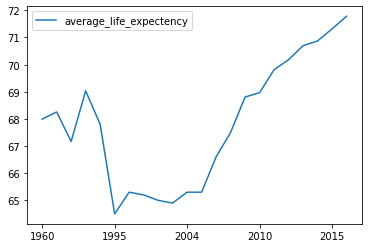

In [19]:

import pandas as pd

expectency_df = pd.DataFrame([expectency_dict]).T.sort_index()
expectency_df.columns = ['average_life_expectency']
expectency_df.plot.line();

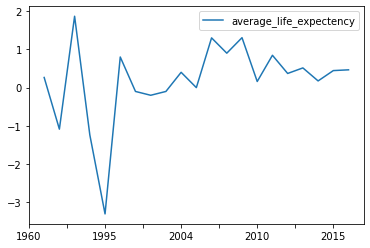

In [21]:

expectency_df.diff().plot.line();

In [22]:

expectency_df.index.min(), expectency_df.index.max()

('1960', '2016')